![imagen](../img/img1.png)


# Proyecto Machine Learning
+ ## **Bank Customer Churn Detection**


**El banco nos solicita conocer cómo puede detectar la salida o rotación de sus clientes; es decir, qué clientes van a cancelar sus cuentas.**
 Resulta más costoso atraer a un nuevo cliente (por ejemplo, mayor gasto en marketing) que mantener a uno existente. Desde este punto de partida, el banco quiere conocer qué clientes puden cancelar su cuenta y qué lleva a un cliente a tomar la decisión de abandonar la empresa. A largo plazo, este aspecto adquiere gran relevancia para el crecimiento del negocio.

* Para ello, aplicaremos una predicción de la rotacion de los clientes del banco: con el fin de construir un modelo de aprendizaje automático para predecir si un cliente abandonará el banco en función de las características proporcionadas. Esto puede ayudar al banco a anticiparse y tomar medidas proactivas para retener a los clientes en riesgo.


Debemos: 
* Analizar y predecir el comportamiento del cliente, especialmente si es probable que abandonen el banco. 
* Identificar factores que contribuyen a la rotación y ayudar en el desarrollo de estrategias para retener a los clientes.


Trabajaremos con los siguientes datos:
* Features : RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Complain, Satisfaction Score, Card Type, Point Earned. 
* Target: `Exited`.

#### Resumen de datos:
1. RowNumber: Número de registro.
2. CustomerId: Código para identificar a cada uno de los clientes.
3. Surname: Apellido del cliente.
4. CreditScore: Mide la facilidad de obtener un crédito.
5. Geography: País de residencia.
6. Gender: Género.
7. Age: Edad.
8. Tenure: Tiempo que lleva el clinte perteneciendo al banco. 
9. Balance: Cantidad de dinero que tiene el cliente en el banco depositado.
10. NumOfProducts: Número de productos que tiene un cliente asociados al banco.
11. HasCrCard: Si el cliente tiene o no una tarjeta de crédito.
12. IsActiveMember: Cliente activo o no.
13. EstimatedSalary: Salario del cliente.
14. **`Exited`: La variable taget que indica si el cliente canceló sus cuentas en el banco o no.**
15. Complain: Indica si el cliente tiene una queja.
16. Satisfaction Score: Puntuación proporcionada por el cliente para la resolución de quejas.
17. Card Type: Tipo de tarjeta que tiene el cliente.
18. Points Earned: Puntos obtenidos por el cliente por el uso de la tarjeta de crédito.

*Fuente del Dataset*: [Kaggle - Bank Customer Data for Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) 

### Visualización de los del Dataset

In [5]:
import zipfile
import pandas as pd
import seaborn as sns

In [6]:
with zipfile.ZipFile('../data_raw/archive.zip') as zip_ref:
    zip_ref.extractall('data_raw')

In [7]:
df= pd.read_csv("../data_raw/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
df["Exited"].value_counts(normalize= True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

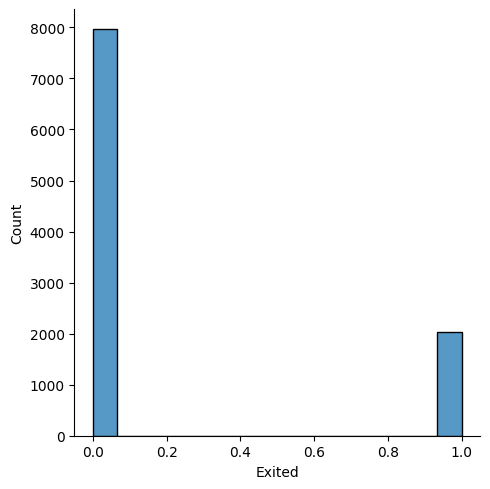

In [12]:
sns.displot(df["Exited"]);


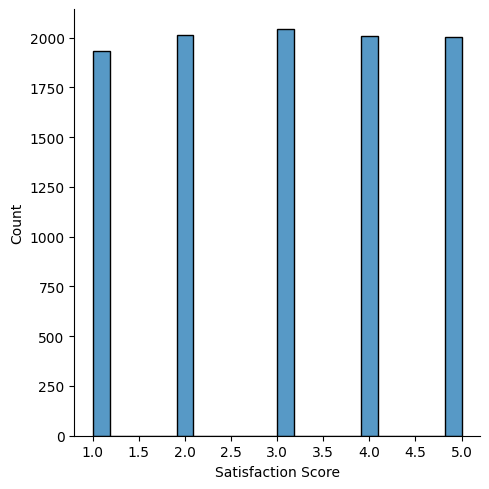

In [13]:
sns.displot(df["Satisfaction Score"]);